In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb

In [55]:
df = pd.read_csv("bank.csv", delimiter=";")

In [56]:
print(f"Shape of DataFrame: {df.shape}")
print(f"Total Null of DataFrame {df. isnull().sum()}")

Shape of DataFrame: (4521, 17)
Total Null of DataFrame age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


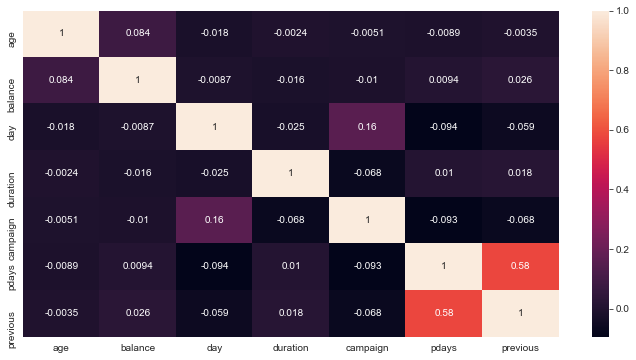

In [57]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [58]:
df[df["balance"]>40000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [59]:
df = df.drop([2989, 3700])

In [64]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [61]:
output = df.pop("y")

In [63]:
output

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4519, dtype: object

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
output = encoder.fit_transform(output)

In [65]:
object_list = df.select_dtypes(["object"]).columns.tolist()

In [66]:
categorical = pd.get_dummies(df[object_list])

In [67]:
numerical = df.select_dtypes(exclude= ["object"])

In [68]:
df = pd.concat([categorical, numerical], axis=1)

In [69]:
df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,30,1787,19,79,1,-1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,33,4789,11,220,1,339,4
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,35,1350,16,185,1,330,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,30,1476,3,199,4,-1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,0,0,1,33,-333,30,329,5,-1,0
4517,0,0,0,0,0,0,1,0,0,0,...,0,0,1,57,-3313,9,153,1,-1,0
4518,0,0,0,0,0,0,0,0,0,1,...,0,0,1,57,295,19,151,11,-1,0
4519,0,1,0,0,0,0,0,0,0,0,...,1,0,0,28,1137,6,129,4,211,3


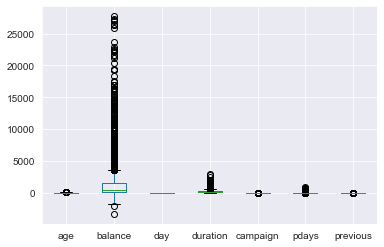

In [70]:
numerical.boxplot()

In [71]:
X = df.values

In [94]:
y = output

In [95]:
print(X.shape)
print(y.shape)

(4519, 51)
(4519,)


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
model = lgb.LGBMClassifier(objective='binary',
                        num_leaves = 23,
                        learning_rate=0.1,
                        n_estimators=100,
                        boosting= "dart")

# 学習する
result = model.fit(X_train, y_train,
                   eval_set=[(X_test, y_test)],
                   eval_metric='multi_logloss' #
                  )

# テストデータで予測する
y_pred = model.predict(X_test)

# Accuracy を計算する
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}") #適合率 1と予測した中で実際にどれだけ1であったかの割合 ex)異常検知システムがアラートを出した回数のうち、実際に異常であった割合
print(f"Recall: {recall_score(y_test, y_pred)}") #再現率 実際は1のデータのうち正しく1と予測できた割合 ex)病気の診断システムで再現率100%といった場合
print(f"F1: {f1_score(y_test, y_pred)}")             #F1スコア 適合率と再現率の調和平均
print(confusion_matrix(y_test, y_pred))
# importanceを表示する
# importance = pd.DataFrame(model.feature_importances_, index=df.columns, columns=['importance'])
# display(importance)

[1]	valid_0's binary_logloss: 0.330973
[2]	valid_0's binary_logloss: 0.313344
[3]	valid_0's binary_logloss: 0.298764
[4]	valid_0's binary_logloss: 0.28919
[5]	valid_0's binary_logloss: 0.280685
[6]	valid_0's binary_logloss: 0.274923
[7]	valid_0's binary_logloss: 0.26927
[8]	valid_0's binary_logloss: 0.272357
[9]	valid_0's binary_logloss: 0.265829
[10]	valid_0's binary_logloss: 0.261414
[11]	valid_0's binary_logloss: 0.257905
[12]	valid_0's binary_logloss: 0.259273
[13]	valid_0's binary_logloss: 0.255662
[14]	valid_0's binary_logloss: 0.252672
[15]	valid_0's binary_logloss: 0.250184
[16]	valid_0's binary_logloss: 0.247226
[17]	valid_0's binary_logloss: 0.244894
[18]	valid_0's binary_logloss: 0.242971
[19]	valid_0's binary_logloss: 0.24108
[20]	valid_0's binary_logloss: 0.239572
[21]	valid_0's binary_logloss: 0.240075
[22]	valid_0's binary_logloss: 0.239358
[23]	valid_0's binary_logloss: 0.23902
[24]	valid_0's binary_logloss: 0.237817
[25]	valid_0's binary_logloss: 0.237135
[26]	valid_0'

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [109]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

[[1160   38]
 [ 101   57]]



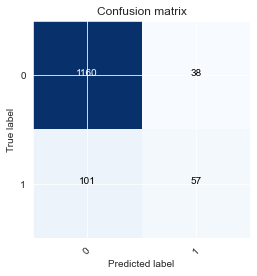

In [110]:
fig, ax = plt.subplots()
plot_confusion_matrix(cm, classes=np.unique(y), ax = ax)

In [111]:
class ModelExtractionCallback(object):

    def __init__(self):
        self._model = None

    def __call__(self, env):
        # _CVBooster の参照を保持する
        self._model = env.model

    def _assert_called_cb(self):
        if self._model is None:
            # コールバックが呼ばれていないときは例外にする
            raise RuntimeError('callback has not called yet')

    @property
    def boosters_proxy(self):
        self._assert_called_cb()
        # Booster へのプロキシオブジェクトを返す
        return self._model

    @property
    def raw_boosters(self):
        self._assert_called_cb()
        # Booster のリストを返す
        return self._model.boosters

    @property
    def best_iteration(self):
        self._assert_called_cb()
        # Early stop したときの boosting round を返す
        return self._model.best_iteration

In [122]:
#  データセットを読み込む

#X, y = df.values, output

# デモ用にデータセットを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# LightGBM 用のデータセット表現に直す
lgb_train = lgb.Dataset(X_train, y_train)

# 学習済みモデルを取り出すためのコールバックを用意する
extraction_cb = ModelExtractionCallback()
callbacks = [
    extraction_cb,
]

# データセットを 5-Fold CV で学習する
lgbm_params = {
    "boosting":"dart", #dart(drop out trees) often performs better
    'objective': 'multiclass',
    'num_class': 3
}
# NOTE: 一般的には返り値の内容 (交差検証の結果) を確認する
lgb.cv(lgbm_params,
        lgb_train,
        num_boost_round=100,
        early_stopping_rounds=10,
        nfold=10,
        shuffle=True,
        stratified=True,
        #seed=42,
        callbacks=callbacks,
        verbose_eval=1
        )

# コールバックのオブジェクトから学習済みモデルを取り出す
proxy = extraction_cb.boosters_proxy
boosters = extraction_cb.raw_boosters
best_iteration = extraction_cb.best_iteration

[1]	cv_agg's multi_logloss: 0.32964 + 0.00642032
[2]	cv_agg's multi_logloss: 0.313275 + 0.00976871
[3]	cv_agg's multi_logloss: 0.300396 + 0.0119928
[4]	cv_agg's multi_logloss: 0.289941 + 0.0136598
[5]	cv_agg's multi_logloss: 0.28136 + 0.0149301
[6]	cv_agg's multi_logloss: 0.273955 + 0.0158648
[7]	cv_agg's multi_logloss: 0.267054 + 0.0171365
[8]	cv_agg's multi_logloss: 0.270096 + 0.016491


/Users/emisohpi/opt/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[9]	cv_agg's multi_logloss: 0.264535 + 0.0169465
[10]	cv_agg's multi_logloss: 0.260003 + 0.0177764
[11]	cv_agg's multi_logloss: 0.256542 + 0.0188099
[12]	cv_agg's multi_logloss: 0.257806 + 0.0182317
[13]	cv_agg's multi_logloss: 0.254115 + 0.0191869
[14]	cv_agg's multi_logloss: 0.251565 + 0.0210459
[15]	cv_agg's multi_logloss: 0.248442 + 0.0214814
[16]	cv_agg's multi_logloss: 0.245636 + 0.0218837
[17]	cv_agg's multi_logloss: 0.243921 + 0.0223548
[18]	cv_agg's multi_logloss: 0.24259 + 0.0232196
[19]	cv_agg's multi_logloss: 0.240628 + 0.0231706
[20]	cv_agg's multi_logloss: 0.239014 + 0.0231504
[21]	cv_agg's multi_logloss: 0.2393 + 0.0228382
[22]	cv_agg's multi_logloss: 0.237575 + 0.0232038
[23]	cv_agg's multi_logloss: 0.23627 + 0.0238357
[24]	cv_agg's multi_logloss: 0.234926 + 0.0240273
[25]	cv_agg's multi_logloss: 0.234089 + 0.024401
[26]	cv_agg's multi_logloss: 0.232761 + 0.0255093
[27]	cv_agg's multi_logloss: 0.231813 + 0.0258572
[28]	cv_agg's multi_logloss: 0.232138 + 0.0257556
[29]	c

In [123]:
# 各モデルで個別に推論する場合
pred_dict={}
for i, booster in enumerate(boosters):
    y_pred_proba = booster.predict(X_test,
                                    num_iteration=best_iteration)
    y_pred = np.argmax(y_pred_proba, axis=1)
    pred_dict.setdefault(i, y_pred)
    accuracy = accuracy_score(y_test, y_pred) #正解率　全体に対して予測が当たった割合
    precision = precision_score(y_test, y_pred) #適合率 1と予測した中で実際にどれだけ1であったかの割合 ex)異常検知システムがアラートを出した回数のうち、実際に異常であった割合
    recall = recall_score(y_test, y_pred) #再現率 実際は1のデータのうち正しく1と予測できた割合 ex)病気の診断システムで再現率100%といった場合
    f1 =f1_score(y_test, y_pred)              #F1スコア 適合率と再現率の調和平均
    #booster.feature_importances
    print(f'Model {i}\n accuracy: {accuracy},\n precision: {precision},\n recall: {recall},\n f1: {f1}')

Model 0
 accuracy: 0.8997050147492626,
 precision: 0.6145833333333334,
 recall: 0.37341772151898733,
 f1: 0.4645669291338583
Model 1
 accuracy: 0.8952802359882006,
 precision: 0.5740740740740741,
 recall: 0.3924050632911392,
 f1: 0.4661654135338346
Model 2
 accuracy: 0.9026548672566371,
 precision: 0.6326530612244898,
 recall: 0.3924050632911392,
 f1: 0.48437500000000006
Model 3
 accuracy: 0.894542772861357,
 precision: 0.5806451612903226,
 recall: 0.34177215189873417,
 f1: 0.4302788844621514
Model 4
 accuracy: 0.8938053097345132,
 precision: 0.57,
 recall: 0.36075949367088606,
 f1: 0.441860465116279
Model 5
 accuracy: 0.8997050147492626,
 precision: 0.6057692307692307,
 recall: 0.3987341772151899,
 f1: 0.48091603053435117
Model 6
 accuracy: 0.8989675516224189,
 precision: 0.6082474226804123,
 recall: 0.37341772151898733,
 f1: 0.46274509803921565
Model 7
 accuracy: 0.9026548672566371,
 precision: 0.6226415094339622,
 recall: 0.4177215189873418,
 f1: 0.4999999999999999
Model 8
 accuracy